### Assignment 4
#### Rushabh Barbhaya
#### 01/08/2022

**Summary**

ADAM: 
Accuracy: 89.04%

SGD: 
Accuracy: 86.47% 

In [1]:
"""
Import block
"""

# Code using keras
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import initializers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Models library
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [2]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(f"shape of the dataset --> {train_images.shape}")
print(f'Labels --> {train_labels}')
print(f'Test dataset shape --> {test_images.shape}')


shape of the dataset --> (60000, 28, 28)
Labels --> [9 0 0 ... 3 0 5]
Test dataset shape --> (10000, 28, 28)


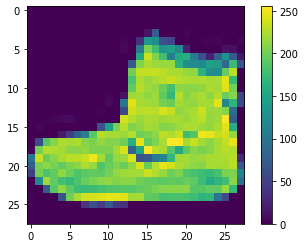

In [4]:
plt.figure()
plt.imshow(
    train_images[
        0
        ]
)
plt.colorbar()
plt.grid(
    False
)
plt.show()

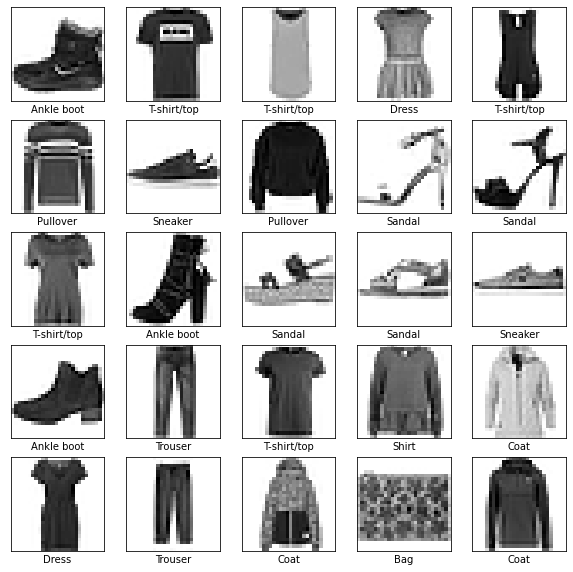

In [5]:
plt.figure(
    figsize=(
        10,
        10
    )
)
for i in range(25):
    plt.subplot(
        5,
        5,
        i+1
    )
    plt.xticks(
        []
    )
    plt.yticks(
        []
    )
    plt.grid(
        False
    )
    plt.imshow(
        train_images[
            i
        ],
        cmap=plt.cm.binary
    )
    plt.xlabel(
        class_names[
            train_labels[
                i
            ]
        ]
    )
plt.show()

In [6]:
num_pixels = train_images.shape[1] * train_images.shape[2]
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)
X_train = X_train / 255
X_test = X_test / 255
Y_test = test_labels
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

hidden_nodes = 128
num_classes = y_test.shape[1]

#tf.random.normal(shape=(hidden_nodes,num_pixels)
def baseline_model(optimizer):
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # sgd = optimizers.SGD(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [7]:
model = baseline_model(optimizer='adam')
adamModel = model.fit(X_train, y_train, validation_split=0.2, epochs=65, batch_size=128)
adamScores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (adamScores[1]*100))

Epoch 1/65


2022-01-14 19:12:25.818095: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


375/375 [==============================] - 1s 2ms/step - loss: 0.6195 - accuracy: 0.7867 - val_loss: 0.4401 - val_accuracy: 0.8445
Epoch 2/65
375/375 [==============================] - 1s 2ms/step - loss: 0.4051 - accuracy: 0.8558 - val_loss: 0.3797 - val_accuracy: 0.8650
Epoch 3/65
375/375 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8679 - val_loss: 0.3683 - val_accuracy: 0.8647
Epoch 4/65
375/375 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8785 - val_loss: 0.3444 - val_accuracy: 0.8744
Epoch 5/65
375/375 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.8852 - val_loss: 0.3464 - val_accuracy: 0.8740
Epoch 6/65
375/375 [==============================] - 1s 2ms/step - loss: 0.2955 - accuracy: 0.8910 - val_loss: 0.3281 - val_accuracy: 0.8848
Epoch 7/65
375/375 [==============================] - 1s 2ms/step - loss: 0.2817 - accuracy: 0.8964 - val_loss: 0.3233 - val_accuracy: 0.8843
Epoch 8/65
375/37

In [8]:
model2 = baseline_model(optimizer='sgd')
sgdModel = model2.fit(X_train, y_train, validation_split=0.2, epochs=65, batch_size=128)
sgdScores = model2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (sgdScores[1]*100))

Epoch 1/65
375/375 [==============================] - 1s 2ms/step - loss: 1.7547 - accuracy: 0.4846 - val_loss: 1.1547 - val_accuracy: 0.6507
Epoch 2/65
375/375 [==============================] - 1s 2ms/step - loss: 0.9578 - accuracy: 0.6689 - val_loss: 0.8244 - val_accuracy: 0.6973
Epoch 3/65
375/375 [==============================] - 1s 2ms/step - loss: 0.7727 - accuracy: 0.7190 - val_loss: 0.7144 - val_accuracy: 0.7388
Epoch 4/65
375/375 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.7516 - val_loss: 0.6506 - val_accuracy: 0.7734
Epoch 5/65
375/375 [==============================] - 1s 2ms/step - loss: 0.6358 - accuracy: 0.7765 - val_loss: 0.6095 - val_accuracy: 0.7897
Epoch 6/65
375/375 [==============================] - 1s 2ms/step - loss: 0.5964 - accuracy: 0.7926 - val_loss: 0.5789 - val_accuracy: 0.7984
Epoch 7/65
375/375 [==============================] - 1s 2ms/step - loss: 0.5664 - accuracy: 0.8048 - val_loss: 0.5529 - val_accuracy: 0.8092
Epoch 

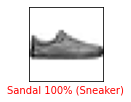

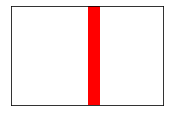

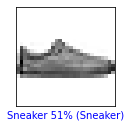

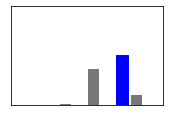

In [9]:
predictions = model.predict(X_test)
predictions[0]
predictions2 = model2.predict(X_test)
predictions2[0]

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 12
plt.figure(figsize=(6,3))
plt.subplot(2,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(2,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()
plt.subplot(2,2,3)
plot_image(i, predictions2, Y_test, test_images)
plt.show()
plt.subplot(2,2,4)
plot_value_array(i, predictions2,  Y_test)
plt.show()

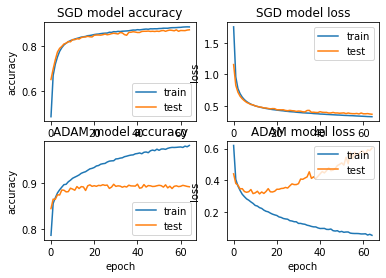

In [10]:
plt.subplot(2,2,1)
plt.plot(sgdModel.history['accuracy'])
plt.plot(sgdModel.history['val_accuracy'])
plt.title('SGD model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,2,2)
plt.plot(sgdModel.history['loss'])
plt.plot(sgdModel.history['val_loss'])
plt.title('SGD model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(2,2,3)
plt.plot(adamModel.history['accuracy'])
plt.plot(adamModel.history['val_accuracy'])
plt.title('ADAM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,2,4)
plt.plot(adamModel.history['loss'])
plt.plot(adamModel.history['val_loss'])
plt.title('ADAM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()